In [63]:
import seaborn as sns
import matplotlib.pyplot as plt


In [64]:
import pandas as pd
df=pd.read_csv('D:\GUVI2\Data\medical_insurance.csv')

In [65]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.dropna(inplace=True)

In [68]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
df['sex'].value_counts()


sex
male      675
female    662
Name: count, dtype: int64

Univariate Analysis

1. What is the distributions of medical insurance charges?

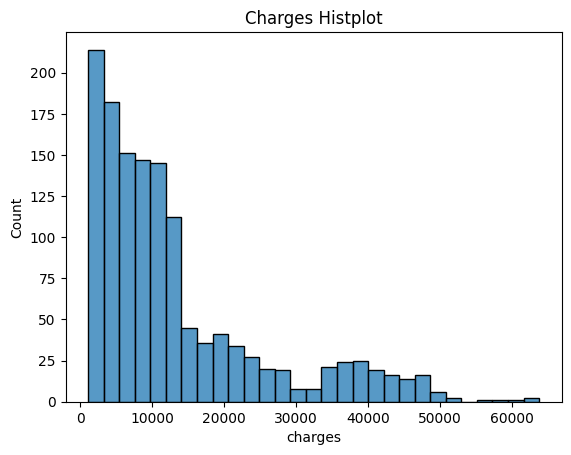

In [71]:
#Univariate Analysis
#Histplot
plt.title('Charges Histplot')
sns.histplot(x='charges', data=df)
plt.show()

2. What is the age distibution of the individuals?

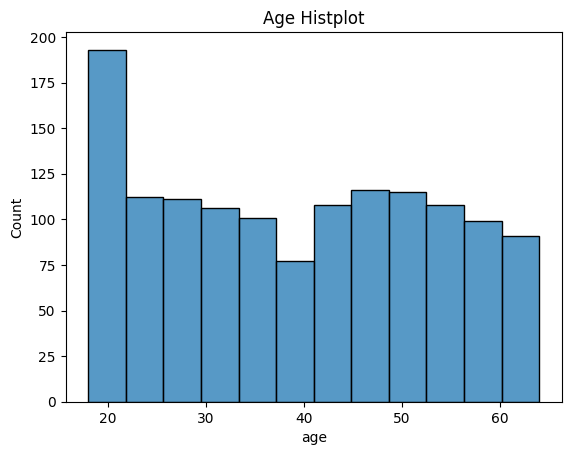

In [72]:
#Age
plt.title('Age Histplot')
sns.histplot(x='age', data=df)
plt.show()

3. Smokers v/s Non-smokers

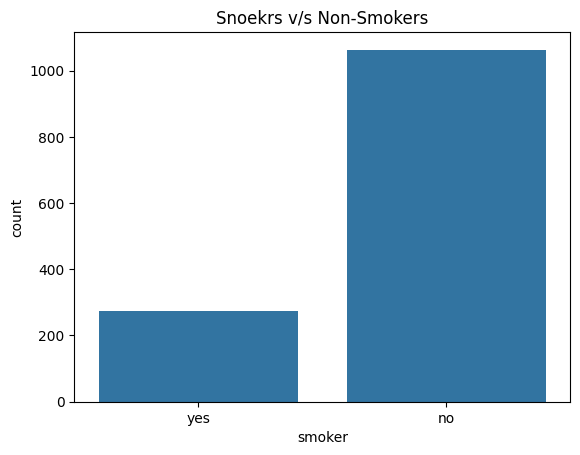

In [73]:
sns.countplot(x='smoker', data=df)
plt.title('Snoekrs v/s Non-Smokers')
plt.show()

4. What is the avergae BMI in the dataset?

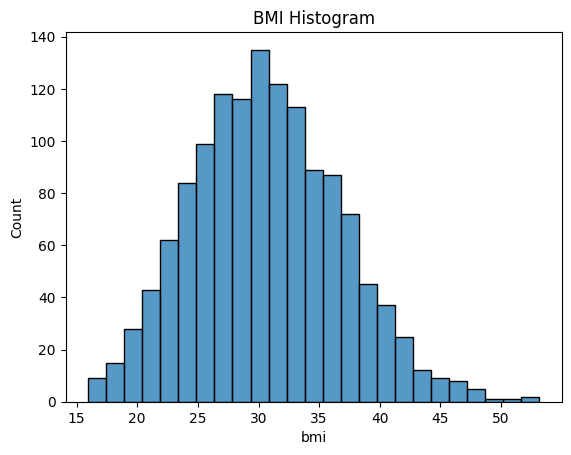

In [74]:
#BMI
plt.title('BMI Histogram')
sns.histplot(x='bmi', data=df)
plt.show()


5. Which regions have the most number of policyholders?

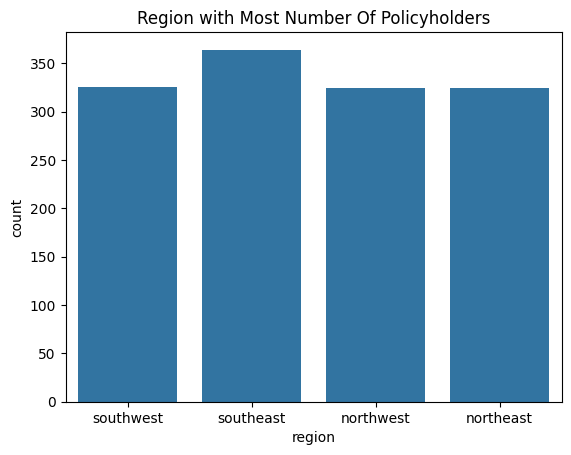

In [75]:
sns.countplot(x='region', data=df)
plt.title('Region with Most Number Of Policyholders')
plt.show()

Bivariate Analysis

1. How do charges vary with age?

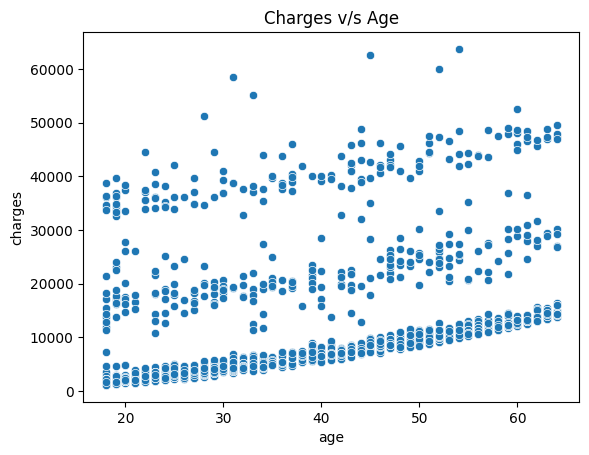

In [76]:
sns.scatterplot(x='age',y='charges', data=df)
plt.title('Charges v/s Age')
plt.show()

2. Is there a difference in average charges between smokers and non-smokers?

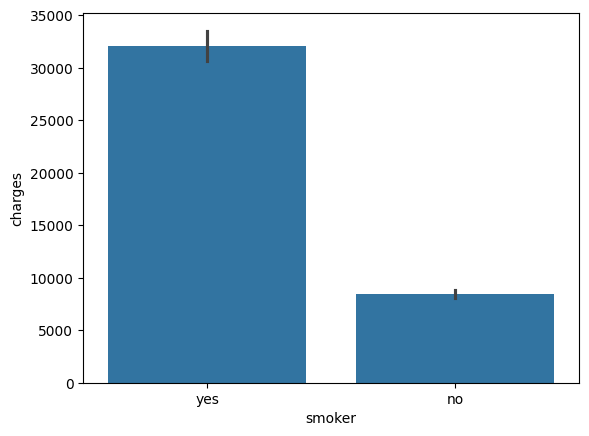

In [77]:
sns.barplot(x='smoker',y='charges', data=df)
plt.show()

3. Does BMI impact insurance charges?

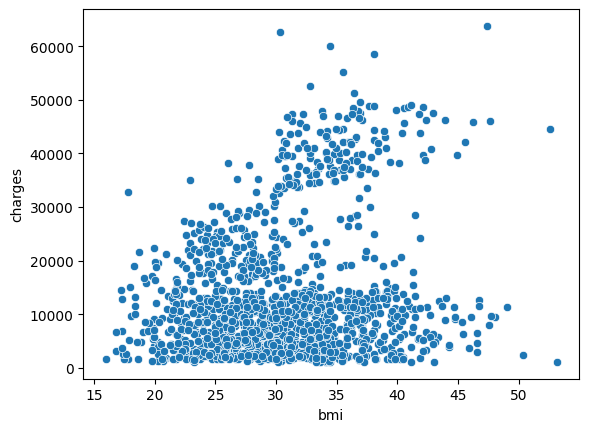

In [78]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

4. Do men or women pay more on average?

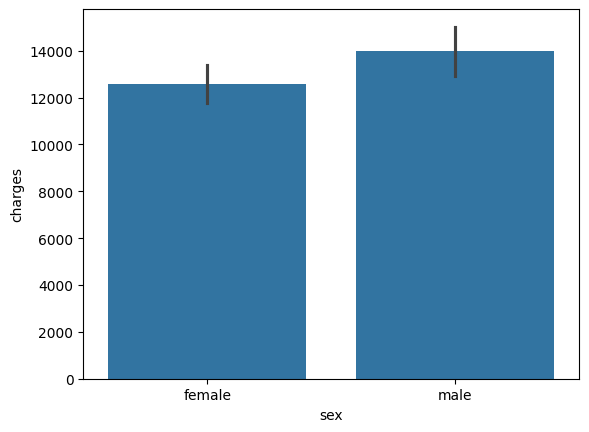

In [79]:
sns.barplot(x='sex', y='charges', data=df)
plt.show()

5. Is there a correlation between the numebr of children and the insurance charges?

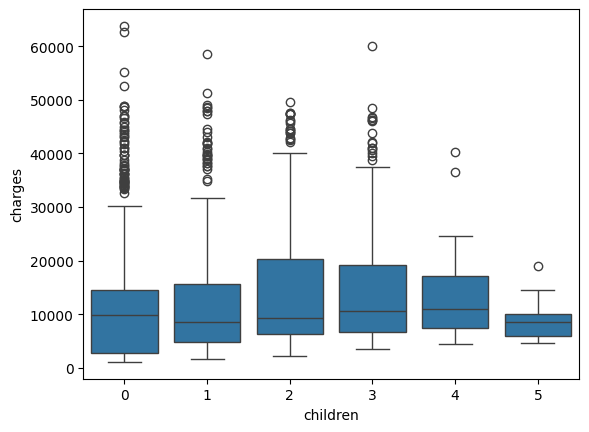

In [80]:
sns.boxplot(x='children', y='charges', data=df)
plt.show()

Multivariate

1. How does smoking status combined with age affect medical charges?

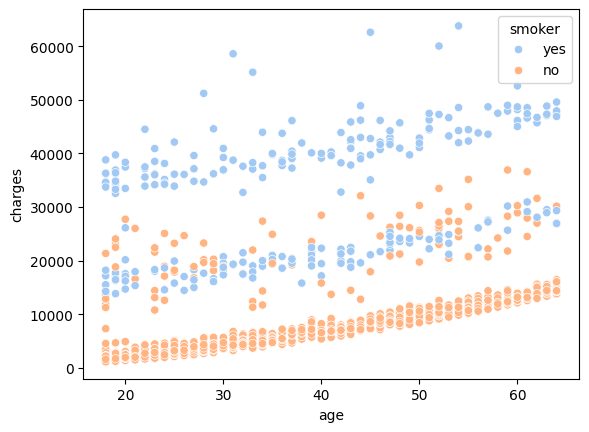

In [81]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='pastel')
plt.show()

2. What is the impact of gender and region on charges for smokers?

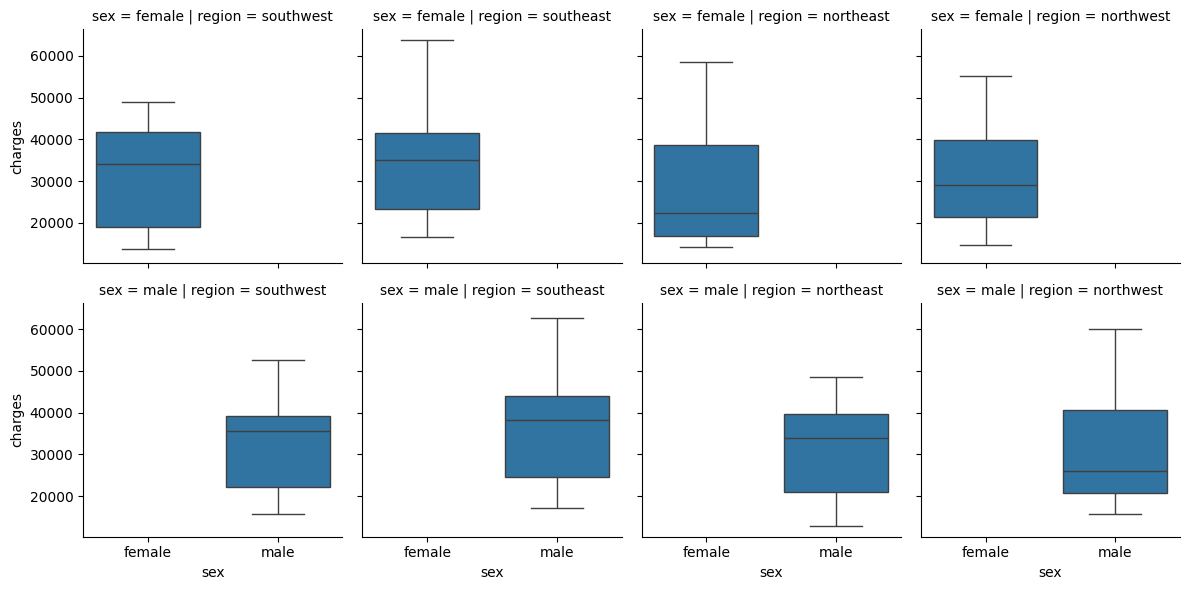

In [82]:
g=sns.FacetGrid(df[df['smoker']=='yes'],row='sex',col='region')
g.map_dataframe(sns.boxplot, x='sex', y='charges')

3. How do age, BMI, and smoking status together affect insurance cost?

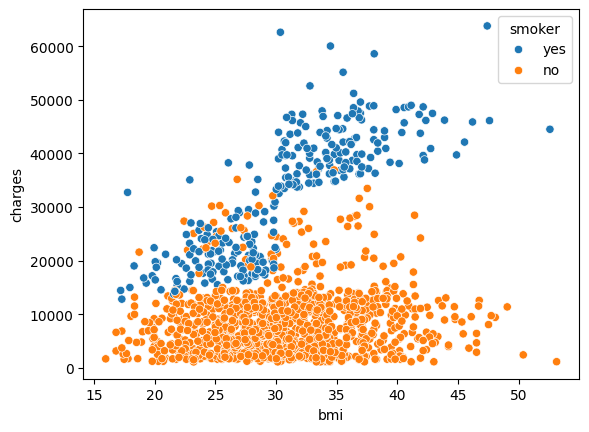

In [83]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.show()

4. Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

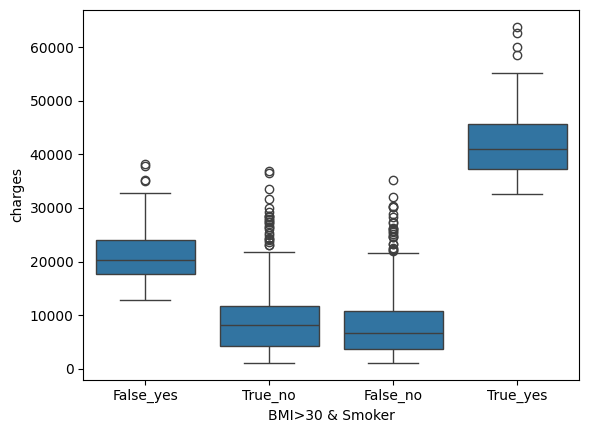

In [84]:
df2=df.copy()
df2['obese']=df2['bmi']>30
df2['group']=df2['obese'].astype(str)+'_'+df2['smoker']
sns.boxplot(x='group',y='charges',data=df2)
plt.xlabel('BMI>30 & Smoker')
plt.show()

Outlier detection

1.  Are there outliers in the charges column?


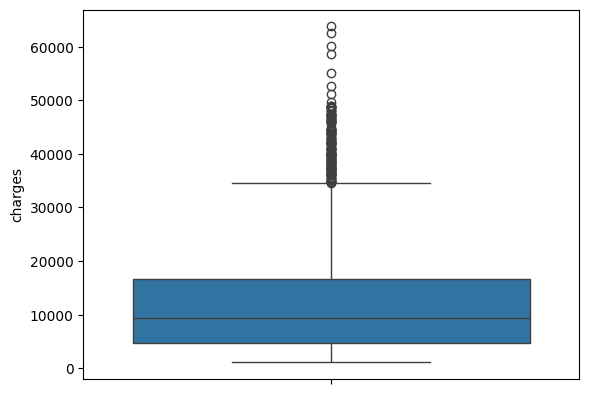

In [85]:
sns.boxplot(y='charges', data=df)
plt.show()

2. Are there extreme BMI values that could skew predictions?

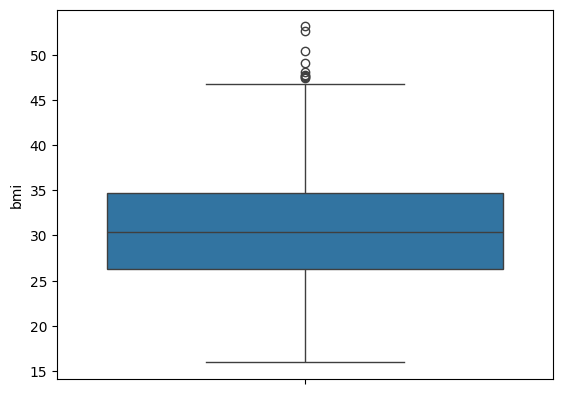

In [86]:
sns.boxplot(y='bmi', data=df)
plt.show()

Correlation Analysis

1. What is the correlation between numeric features and charges?

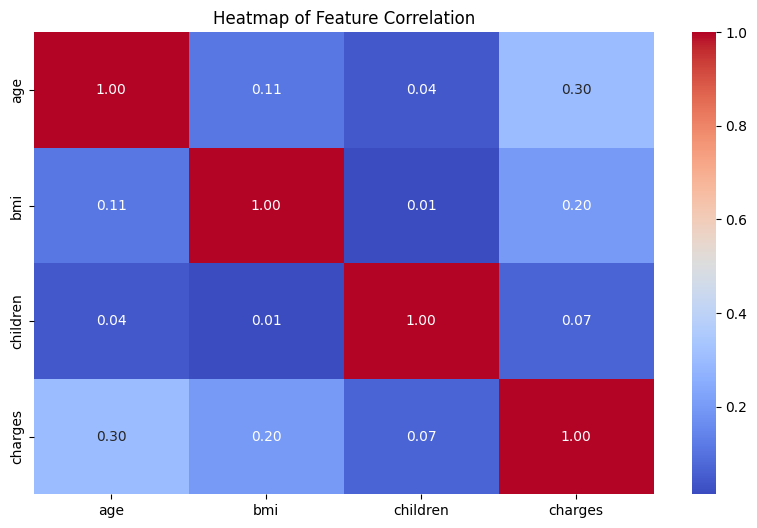

In [87]:
#Correlation heatmap
import numpy as np
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlation')
plt.show()

2. Which features have the strongest correlation with charges?

In [88]:
corr_matrix=df.corr(numeric_only=True)
print(corr_matrix['charges'].sort_values(ascending=False))

charges     1.000000
age         0.298308
bmi         0.198401
children    0.067389
Name: charges, dtype: float64


Encoding

In [89]:
df['sex']=df['sex'].map({'male':1,'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})


In [90]:
df['region'].dtype

dtype('O')

In [91]:
#One-hot encoding for nominal variables
df=pd.get_dummies(df, columns=['region'], drop_first=True)

In [92]:
df=df.astype(int)

In [93]:
print(df.dtypes)

age                 int64
sex                 int64
bmi                 int64
children            int64
smoker              int64
charges             int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object


Regression Models

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [95]:
#Defining target vector as 'y' and features as 'x'
y=df['charges']
x=df.drop(['charges'],axis=1)

In [96]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((1069, 8), (268, 8), (1069,), (268,))

In [98]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Linear regression

In [99]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
lin_pred=model.predict(x_test_scaled)

In [100]:
from sklearn.metrics import mean_squared_error
from math import sqrt
r2_lin=r2_score(y_test, lin_pred)
mse_lin=mean_squared_error(y_test,lin_pred)
rmse_lin=sqrt(mse_lin)
print('MSE Score:', mse_lin)
print('RMSE Score',rmse_lin)
print('R2 Score:',r2_lin)



MSE Score: 35475294.14291127
RMSE Score 5956.114013592358
R2 Score: 0.8069435680345955


KNN

In [101]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scaled,y_train)
knn_pred=knn.predict(x_test_scaled)


In [102]:
r2_knn=r2_score(y_test, knn_pred)
mse_knn=mean_squared_error(y_test,knn_pred)
rmse_knn=sqrt(mse_knn)
print('MSE Score:', mse_knn)
print('RMSE Score',rmse_knn)
print('R2 Score:',r2_knn)


MSE Score: 29956539.058208957
RMSE Score 5473.256714078827
R2 Score: 0.8369766147304594


Decision tree Regressor

In [103]:
from sklearn.tree import DecisionTreeRegressor
dct=DecisionTreeRegressor(random_state=42)
dct.fit(x_train_scaled,y_train)
dct_pred=dct.predict(x_test_scaled)


In [104]:
r2_dct=r2_score(y_test,dct_pred)
mse_dct=mean_squared_error(y_test,dct_pred)
rmse_dct=sqrt(mse_dct)
print('MSE Score:', mse_dct)
print('RMSE Score',rmse_dct)
print('R2 Score:',r2_dct)

MSE Score: 43482627.833022386
RMSE Score 6594.135867042958
R2 Score: 0.7633676848990888


Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train_scaled,y_train)
rf_pred=rf.predict(x_test_scaled)


In [106]:
r2_rf=r2_score(y_test,rf_pred)
mse_rf=mean_squared_error(y_test,rf_pred)
rmse_rf=sqrt(mse_rf)
print('MSE Score:', mse_rf)
print('RMSE Score',rmse_rf)
print('R2 Score:',r2_rf)


MSE Score: 22687493.092984863
RMSE Score 4763.138995765803
R2 Score: 0.8765347385386901


XGBoost Regressor

In [107]:
from xgboost import XGBRegressor
xgr=XGBRegressor(random_state=42)
xgr.fit(x_train_scaled,y_train)
xgr_pred=xgr.predict(x_test_scaled)



In [108]:
r2_xgr=r2_score(y_test,xgr_pred)
mse_xgr=mean_squared_error(y_test,xgr_pred)
rmse_xgr=sqrt(mse_xgr)
print('MSE Score:', mse_xgr)
print('RMSE Score',rmse_xgr)
print('R2 Score:',r2_xgr)

MSE Score: 27531908.0
RMSE Score 5247.085667301421
R2 Score: 0.8501714468002319


LBGM Regressor

In [109]:
from lightgbm import LGBMRegressor
lgbmr=LGBMRegressor(random_state=42)
lgbmr.fit(x_train_scaled,y_train)
lgbmr_pred=lgbmr.predict(x_test_scaled)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 13029.711880


c:\Users\Ananya R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [110]:
r2_lgbmr=r2_score(y_test,lgbmr_pred)
mse_lgbmr=mean_squared_error(y_test,lgbmr_pred)
rmse_lgbmr=sqrt(mse_lgbmr)
print('MSE Score:', mse_lgbmr)
print('RMSE Score',rmse_lgbmr)
print('R2 Score:',r2_lgbmr)


MSE Score: 21633313.84818135
RMSE Score 4651.162634028329
R2 Score: 0.8822715784598446


CatBoost Regressor

In [111]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor(verbose=0,random_state=42)
cbr.fit(x_train_scaled,y_train)
cbr_pred=cbr.predict(x_test_scaled)



In [112]:
r2_cbr=r2_score(y_test,cbr_pred)
mse_cbr=mean_squared_error(y_test,cbr_pred)
rmse_cbr=sqrt(mse_cbr)
print('MSE Score:', mse_cbr)
print('RMSE Score',rmse_cbr)
print('R2 Score:',r2_cbr)


MSE Score: 23087032.427584186
RMSE Score 4804.896713518844
R2 Score: 0.8743604468173347


ML Flow

In [113]:
import mlflow

In [114]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')


In [115]:
#Get the mlflow ui from command prompt mlflow ui
#coding for mlflow

models={
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0,random_state=42)
    }

In [118]:
mlflow.set_experiment('MED_INSURANCE_CHARGES_PREDICTION')
for model_name, model in models.items():
    with mlflow.start_run():
        model.fit(x_train_scaled,y_train)
        y_pred=model.predict(x_test_scaled)

        r2=r2_score(y_test,y_pred)
        mse=mean_squared_error(y_test,y_pred)
        rmse=sqrt(mse)

        mlflow.log_param('model', model_name)
        mlflow.log_metric('r2_score',r2)
        mlflow.log_metric('mse',mse)
        mlflow.log_metric('rmse',rmse)


        input_example=x_test.iloc[0].values.reshape(1,-2)
        mlflow.sklearn.log_model(model,model_name, input_example=input_example)

        print(f"Logged {model_name} with r2: {r2}")

print("All pre-trained models have been logged to mlflow")

2025/07/19 10:54:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged LinearRegression with r2: 0.8069435680345955
🏃 View run rebellious-asp-296 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/0a5fd29bc4dd4264ae38f66be5f875fb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304


2025/07/19 10:54:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged KNN with r2: 0.8369766147304594
🏃 View run orderly-whale-89 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/8d9bff831b774cafaf405a0126a1c340
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304


2025/07/19 10:54:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged DecisionTree with r2: 0.7633676848990888
🏃 View run carefree-cub-351 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/a3ac09e1647f459f8e51f642cb1bc8bc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304


2025/07/19 10:54:21 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged RandomForest with r2: 0.8765347385386901
🏃 View run judicious-shrew-879 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/9bf299545ca64720a3d16a84007a3f22
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304


2025/07/19 10:54:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged XGBoost with r2: 0.8501714468002319
🏃 View run learned-robin-7 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/fac804323e3d4cd1b80c6a39dae885be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 8
[LightGBM] [Info] Start training from score 13029.711880


c:\Users\Ananya R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
2025/07/19 10:54:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\Ananya R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ananya R\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Logged LightGBM with r2: 0.8822715784598446
🏃 View run auspicious-mole-683 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/8f83cff6cbcd469c962a38328746e2c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304


2025/07/19 10:54:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Logged CatBoost with r2: 0.8743604468173347
🏃 View run merciful-crow-217 at: http://127.0.0.1:5000/#/experiments/665275308149374304/runs/69d0eb001deb4c4dbf7d116c9edc16f5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/665275308149374304
All pre-trained models have been logged to mlflow


In [159]:
%%writefile medins_chargepred.py

import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df=pd.read_csv('D:\GUVI2\Data\medical_insurance.csv')

# Set page configuration
st.set_page_config(page_title='Medical Insurance Charges Prediction', layout='wide')

# Sidebar Navigation
st.sidebar.title('🚀 Navigation')
page = st.sidebar.radio('Go to', ['Project Introduction', 'Data Overview', 'Exploratory Data Analysis'])

# Project Introduction Page
if page == 'Project Introduction':
    st.markdown("""
    # 💡 Medical Insurance Cost Prediction
    ## 🔍 Project Overview
    This project predicts medical insurance charges using ML models based on age, gender, BMI, smoking status, and more.

    ### 🏥 Business Use Cases
    - Insurance premium estimation
    - Policy comparison for individuals
    - Healthcare cost planning
    - Cost transparency

    ### 🔧 Model Pipeline
    - Data Preprocessing
    - Feature Engineering
    - Model Training & Evaluation
    - Streamlit Deployment

    ### 🚀 Outcome
    Empower users with better insights into healthcare costs using data.
    """)

# Data Overview Page
elif page == 'Data Overview':
    st.markdown("""
    # 📊 Dataset Overview
    Key Features:
    - **Age**: Age of the person
    - **Sex**: Gender
    - **BMI**: Body Mass Index
    - **Children**: Number of dependents
    - **Smoker**: Smoking status
    - **Region**: Residential region
    - **Charges**: Medical charges (target)

    Explore data and visualize relationships!
    """)
    st.dataframe(df)

# Exploratory Data Analysis Page
elif page == 'Exploratory Data Analysis':
    st.title('🔍 Exploratory Data Analysis (EDA)')

    analysis_type = st.selectbox(
        'Select type of analysis:',
        ['Univariate Analysis', 'Bivariate Analysis', 'Multivariate Analysis', 'Outlier Detection', 'Correlation Analysis']
    )

    if analysis_type == 'Univariate Analysis':
        st.subheader('Univariate Analysis')
        question = st.selectbox('Choose a question:', [
            '1. Distribution of Medical Insurance Charges',
            '2. Age Distribution of individuals',
            '3. Smokers vs Non-Smokers',
            '4. Average BMI',
            '5. Policyholders by Region'
        ])
        if question.startswith('1'):
            st.subheader('1. What is the distribution of medical insurance charges?')
            plt.title('Charges Histplot')
            sns.histplot(x='charges', data=df)
            st.pyplot()
        elif question.startswith('2'):
            st.subheader('2.What is the age distribution of the individuals?')
            plt.title('Age Histplot')
            sns.histplot(x='age', data=df)
            st.pyplot()
        elif question.startswith('3'):
            st.subheader('3.How many people are smokers vs non-smokers?')
            sns.countplot(x='smoker', data=df)
            plt.title('Smokers v/s Non-Smokers')
            st.pyplot()
        elif question.startswith('4'):
            st.subheader('4. What is the average BMI in the dataset?')
            plt.title('BMI Histogram')
            sns.histplot(x='bmi', data=df)
            st.pyplot()
        elif question.startswith('5'):
            st.subheader('5. Which regions have the most number of policyholders?')
            sns.countplot(x='region', data=df)
            plt.title('Region with Most Number Of Policyholders')
            st.pyplot()

    elif analysis_type == 'Bivariate Analysis':
        question = st.selectbox('Choose a question:', [
            '1. How do charges vary with age?',
            '2. Is there a difference in average charges between smokers and non-smokers?',
            '3. Does BMI impact insurance charges?',
            '4. Do men or women pay more on average?',
            '5. Is there a correlation between the number of children and the insurance charges?'
        ])
        if question.startswith('1'):
            st.subheader('1. How do charges vary with age?')
            sns.scatterplot(x='age', y='charges', data=df)
            plt.title('Charges v/s Age')
            st.pyplot()
        elif question.startswith('2'):
            st.subheader('2. Is there a difference in average charges between smokers and non-smokers?')
            sns.barplot(x='smoker', y='charges', data=df)
            st.pyplot()
        elif question.startswith('3'):
            st.subheader('3. Does BMI impact insurance charges?')
            sns.scatterplot(x='bmi', y='charges', data=df)
            st.pyplot()
        elif question.startswith('4'):
            st.subheader('4. Do men or women pay more on average?')
            sns.barplot(x='sex', y='charges', data=df)
            st.pyplot()
        elif question.startswith('5'):
            st.subheader('5. Is there a correlation between the number of children and the insurance charges?')
            sns.boxplot(x='children', y='charges', data=df)
            st.pyplot()

    elif analysis_type == 'Multivariate Analysis':
        question = st.selectbox('Choose a question:', [
            '1. How does smoking status combined with age affect medical charges?',
            '2. What is the impact of gender and region on charges for smokers?',
            '3. How do age, BMI, and smoking status together affect insurance cost?',
            '4. Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?'
        ])
        if question.startswith('1'):
            st.subheader('1. How does smoking status combined with age affect medical charges?')
            sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='pastel')
            st.pyplot()
        elif question.startswith('2'):
            st.subheader('2. What is the impact of gender and region on charges for smokers?')
            g = sns.FacetGrid(df[df['smoker'] == 'yes'], row='sex', col='region')
            g.map_dataframe(sns.boxplot, x='sex', y='charges')
            st.pyplot()
        elif question.startswith('3'):
            st.subheader('3. How do age, BMI, and smoking status together affect insurance cost?')
            sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
            st.pyplot()
        elif question.startswith('4'):
            st.subheader('4. Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?')
            df2 = df.copy()
            df2['obese'] = df2['bmi'] > 30
            df2['group'] = df2['obese'].astype(str) + '_' + df2['smoker']
            sns.boxplot(x='group', y='charges', data=df2)
            plt.xlabel('BMI > 30 & Smoker')
            st.pyplot()

    elif analysis_type == 'Outlier Detection':
        question = st.selectbox('Choose a question:', [
            '1. Are there outliers in the charges column? Who are the individuals paying the highest costs?',
            '2. Are there extreme BMI values that could skew predictions?'
        ])
        if question.startswith('1'):
            st.subheader('1. Are there outliers in the charges column? Who are the individuals paying the highest costs?')
            sns.boxplot(y='charges', data=df)
            st.pyplot()
        elif question.startswith('2'):
            st.subheader('2. Are there extreme BMI values that could skew predictions?')
            sns.boxplot(y='bmi', data=df)
            st.pyplot()

    elif analysis_type == 'Correlation Analysis':
        question = st.selectbox('Choose a question:', [
            '1. What is the correlation between numeric features like age, BMI, number of children, and charges?',
            '2. Which features have the strongest correlation with the target variable (charges)?'
        ])
        if question.startswith('1'):
            st.subheader('1. What is the correlation between numeric features like age, BMI, number of children, and charges?')
            plt.figure(figsize=(10, 6))
            sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
            plt.title('Heatmap of Feature Correlation')
            st.pyplot()
        elif question.startswith('2'):
            st.subheader('2. Which features have the strongest correlation with the target variable (charges)?')
            corr_matrix = df.corr(numeric_only=True)
            st.dataframe(corr_matrix['charges'].sort_values(ascending=False))


Overwriting medins_chargepred.py


In [160]:
!streamlit run medins_chargepred.py

^C
